# HAI507I Calcul formel et scientifique
# Contrôle continu - mercredi 1er décembre 2021

Ce sujet est constitué de deux exercices indépendants. Il est noté sur 20 points. La durée est d'1h30.

Merci de rentrer vos nom et prénom ci-dessous :

In [1]:
# Nom : 
# Prénom : 

In [ ]:
# Note : 

## Suites récurrentes sur un corps fini

$\newcommand{\ZpZ}{\mathbb Z/2\mathbb Z}$
On considère dans cet exercice des *suites récurrentes binaires*, c'est-à-dire des suites $(u_n)_{n≥0}$ d'éléments de $\ZpZ$, définies par $k$ valeurs $u_0$, …, $u_{k-1}\in\ZpZ$ et la récurrence
$$ u_{n+k} = \alpha_0u_n + \alpha_1 u_{n+1} + \dotsb + \alpha_{k-1} u_{n+k-1} \tag{1}$$
où $\alpha_0$, …, $\alpha_{k-1}\in\ZpZ$. Ces suites jouent un rôle majeur en cryptographie.

**Exécuter la cellule suivante avant de commencer. Dans toute la suite, on pourra définir un élément de $\ZpZ$ avec `Z2(0)` ou `Z2(1)`. Attention, il ne faut pas redéfinir la variable X.**

In [1]:
Z2 = GF(2)
R.<X> = Z2[]

### Question

1. Écrire une fonction `liste(N, U, A)` qui prend en entrée un entier $N$, et deux listes $U = [u_0,…,u_{k-1}]$ et $A = [\alpha_0, …, \alpha_{k-1}]$ et renvoie la liste des $N$ premiers termes de la suite $(u_n)$ définie par la récurrence (1).

1. On définit une suite $(v_n)_n$ par $v_0 = v_1 = v_2 = 1$ et $v_{n+3} = v_{n+2}+v_n$. Définir les listes `Uv` et `Av` correspondant à la suite $(v_n)_n$ et calculer `V1000 = liste(1000, Uv, Av)`. *Attention, `Uv` et `Av` doivent contenir des éléments de $\ZpZ$.*

In [89]:
# Réponse 1.
def liste(N, U, A):
    termes = [u for u in U]
    while(len(termes)<N):
        nouveauU = 0
        for i in range(len(A)):
            nouveauU += A[i]*termes[(len(termes)-len(A))+i]
        termes.append(Z2(nouveauU))
    return termes[:N]

In [96]:
# Réponse 2.
Uv = [1,1,1]
Av = [1,0,1]
V1000 = liste(1000, Uv, Av)
print(V1000)

[1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 

In [85]:
# Cellule de test (à exécuter uniquement)
len(V1000)==1000 and V1000[-10:]==[Z2(e) for e in [0,1,0,0,1,1,1,0,1,0]]

True

### Question

On peut montrer que toute suite récurrente binaire telle que $\alpha_{k-1} = 1$ est périodique, c'est-à-dire qu'il existe un entier $T$ tel que $u_{n+T} = u_n$ pour tout $n$. 

Pour trouver cette période, on peut utiliser la remarque suivante : comme $u_{n+k}$ ne dépend que de $u_{n}$, …, $u_{n+k-1}$, **la période $T$ est égale au plus petit indice $m$ tel que $[u_0,…,u_{k-1}] = [u_m,…,u_{m+k-1}]$**. 

*Par exemple, la suite $(v_n)_n$ est de période $7$, car $[v_0,v_1,v_2] = [v_7,v_8,v_9]$ et $[v_0,v_1,v_2]\neq[v_i,v_{i+1},v_{i+2}]$ pour $0 < i < 7$.* 

1. Écrire une fonction `periode(U,A)` qui prend en entrée $U = [u_0,…,u_{k-1}]$ et $A = [\alpha_0, …, \alpha_{k-1}]$ et renvoie la période $T$ de la suite $(u_n)_n$. *Indication. Utiliser la remarque en gras.*

1. Vérifier que votre fonction renvoie bien $7$ sur l'entrée `Uv`, `Av` correspondant à la suite $(v_n)_n$ de la question précédente.

1. Calculer la période de la suite $(w_n)_n$ définie par $w_0 = w_1 = w_3 = 1$ et $w_2 = w_4 = w_5 = 0$, et $w_{n+6} = w_n + w_{n+3} + w_{n+4} + w_{n+5}$.

In [118]:
# Réponse 1.
def periode(U,A):
    tour = 0
    L = []
    while(1):
        tour += 1
        L = liste(len(U)+tour, U, A)
        if(L[-len(U):] == U):
            return tour

In [120]:
# Réponse 2.
p = periode(Uv,Av)
print(p)
bool(p == 7)

7


True

In [133]:
# Réponse 3.
Wn = [1,1,0,1,0,0]
Aw = [1,0,0,1,1,1]
p = periode(Wn,Aw)
print(p)

15


### Question

On associe à une suite récurrente binaire $(u_n)_n$ de récurrence (1) un *polynôme $P_u$ à coefficients dans $\ZpZ$* défini par 
$$P_u(X) = X^k + \alpha_{k-1}X^{k-1} + \alpha_{k-2}X^{k-2}+ \dotsb + \alpha_1X+\alpha_0.$$ 

On peut calculer la période $T$ de $(u_n)_n$ à partir de $P_u$ : $T$ est égale au plus petit exposant $e$ tel que $P_u$ divise le polynôme $X^e-1$.

*Indication `SageMath` : si `P` et `Q` sont deux polynômes, `P.divides(Q)` renvoie `True` si $P$ divise $Q$, et `False` sinon.*

1. Écrire une fonction `poly(A)` qui prend en entrée la liste $A = [\alpha_0,…,\alpha_{k-1}]$ et renvoie le polynôme $P_u$ correspondant.

1. Écrire une fonction `periode_poly(A)` qui calcule la période de la suite $(u_n)_n$ en utilisant le polynôme associé à $(u_n)_n$.

1. Re-calculer la période des deux suites $v$ (de la question 1.) et $w$ (de la question 2.) à l'aide de `periode_poly`.



In [144]:
# Réponse 1.
def poly(A):
    var('x')
    R.<x> = Z2[]
    P = 0
    for i in range(len(A)):
        P += A[i]*x^i
    P += x^(len(A))
    return P

In [147]:
# Réponse 2.
def periode_poly(A):
    var('x')
    R.<x> = Z2[]
    P = poly(A)
    Q = 0
    e = 0
    while(1):
        e += 1
        Q = x^e - 1
        if(P.divides(Q)):
            return e

In [148]:
# Réponse 3.
print(periode_poly(Av))
print(periode_poly(Aw))

7
15


## Calcul de cercles circonscrits

En géométrie dans le plan, un cercle de rayon $r$ centré en l'origine $(0,0)$ correspond à l'ensemble des points $P$ de coordonnées $(p_x,p_y)$ qui se trouvent à une distance $r$ de l'origine. Grâce au théorème de Pythagore, on sait que la distance d'un point $P$ à l'origine est $\sqrt{p_x^2+p_y^2}$. Par conséquent on peut définir ce cercle par l'ensemble des points $P$ vérifiant l'équation $p_x^2+p_y^2 = r^2$. 

Cela revient à dire que le cercle est déterminé par l'équation $x^2+y^2=r^2$. Exécuter la cellule suivante pour obtenir un dessin qui illustre le principe.

In [149]:
c=(0,0)
r=4
@interact 
def _(x0=slider(-r,r, step_size=.3),neg=checkbox(False, label='negative')):
    if (neg) : 
        y0=-sqrt(r^2-x0^2)
    else :
        y0=sqrt(r^2-x0^2)
    return circle(c,r)+point([x0,y0],color="red",size=50)+polygon([(0,0),(x0,0),(x0,y0)],fill=false,color="green")

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


De manière plus générale, l'équation d'un cercle de rayon $r$ centré en un point de coordonnées $(o_x,o_y)$ s'écrit 
$$(x-o_x)^2+(y-o_y)^2 = r^2.$$
Cette équation peut être réécrite comme suit:
$$ \begin{cases} x^2+y^2 &= 2o_xx+2o_yy  - \alpha  \\ \alpha &=o_x^2+o_y^2-r^2 \end{cases}$$

### Question 
Soit un cercle $C$ de rayon 5 et de centre $(3,1)$.
 1. Déterminer parmi les points suivants   [(-1,-2), (0,6), (3,6), (2,6), (7,-2), (6,4.99), (3,6)]   ceux qui appartiennent à ce cercle. Vous devrez utiliser du calcul pour vérifier l'appartenance au cercle.
 1. Afficher le cercle $C$ et les points qui appartiennent au cercle. Vous pourrez utiliser la fonction `circle` (voir graphique ci-dessus).

In [157]:
# Réponse 1.
P = [[-1,-2],[0,6],[3,6],[2,6],[7,-2],[6,4.99],[3,6]]
Q = []
for p in P:
    if(5^2 == (p[0]-3)^2 + (p[1]-1)^2):
        Q.append(p)
print(Q)

[[-1, -2], [3, 6], [7, -2], [3, 6]]


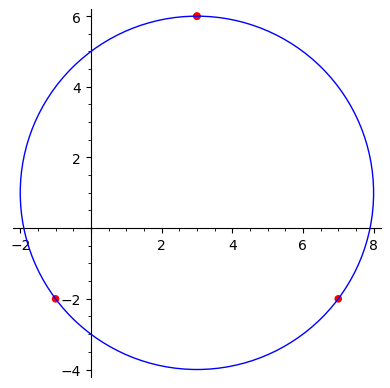

In [158]:
# Réponse 2.
graph = circle((3,1),5)+point(Q,color="red",size=30)
show(graph)

### Question

Étant donné trois points distincts $A,B,C \in \mathbf{R}^2$ (non alignés), il est toujours possible de trouver un cercle qui passe par ces trois points. En effet, la théorie du cercle circonscrit à un triangle nous indique que les médiatrices des segments $[AB]$, $[BC]$ et $[AC]$ se coupent en un point qui est équidistant à $A$, $B$ et $C$. Ce point est par conséquent le centre d'un cercle qui passe par les points $A,B$ et $C$.

Une façon de trouver le centre et le rayon du cercle circonscrit est de passer par l'algèbre linéaire. En effet, l'équation d'un cercle est $$ \begin{cases} x^2+y^2 &= & 2o_xx+2o_yy  - \alpha  \\ \alpha&=&o_x^2+o_y^2-r^2 \end{cases}$$

Si $A,B$ et $C$ sont sur un cercle de rayon $r$ de centre $(o_x,o_y)$ alors ils vérifient son équation. Ceci peut se réécrire comme le système linéaire suivant :

$$
\begin{bmatrix}
2x_A & 2 y_A & -1 \\
2x_B & 2 y_B & -1 \\
2x_C & 2 y_C & -1 \\
\end{bmatrix}
\times
\begin{bmatrix}
o_x \\
o_y \\
\alpha
\end{bmatrix}
=
\begin{bmatrix}
x_A^2+y_A^2 \\
x_B^2+y_B^2 \\
x_C^2+y_C^2
\end{bmatrix}
$$
où $A=(x_A, y_A),B=(x_B, y_B),C=(x_C, y_C)$.  

Par conséquent, nous pouvons retrouver les coordonnées du centre $(o_x,o_y)$ du cercle passant par les points $A,B$ et $C$ en résolvant ce système. Le calcul du rayon nécessitera de calculer la valeur $r=\sqrt{o_x^2+o_y^2-\alpha}$, une fois que le centre $(o_x,o_y)$ est trouvé.

1. Écrire une fonction `systeme` qui prend en entrée trois points $A$, $B$ et $C$ et renvoie la matrice $\left(\begin{smallmatrix}
2x_A & 2 y_A & -1 \\
2x_B & 2 y_B & -1 \\
2x_C & 2 y_C & -1 \\
\end{smallmatrix}\right)$ et le vecteur 
$\left(\begin{smallmatrix}
x_A^2+y_A^2 \\
x_B^2+y_B^2 \\
x_C^2+y_C^2
\end{smallmatrix}\right)$.
1. Écrire une fonction `findCircle` qui prend en entrée 3 points et qui retourne le centre et le rayon.
1. Appliquer `findCircle` avec les points A=(3,5), B=(-2,1) et C=(4,-5).
1. Faites un dessin qui affiche les 3 points en rouge, le cercle en bleu et son centre O en orange.

In [1]:
# Réponse 1.
def systeme(A,B,C):
    M = matrix([[2*A[0],2*A[1],-1],[2*B[0],2*B[1],-1],[2*C[0],2*C[1],-1]])
    V = matrix([[A[0]^2 + A[1]^2],[B[0]^2 + B[1]^2],[C[0]^2 + C[1]^2]])
    return M,V

In [31]:
# Réponse 2.
def findCircle(A,B,C):
    M,V = systeme(A,B,C)
    X = M.solve_right(V) #X les point centraux du cercle
    Ox,Oy,a = X[0],X[1],X[2]
    r = sqrt(Ox[0]^2 + Oy[0]^2 - a[0])
    return (Ox[0],Oy[0]),r

In [32]:
# Réponse 3.
o,r = findCircle([3,5],[-2,1],[4,.5])
print("o =",o,"\n r =",r)

o = (1.12264150943396, 2.22169811320755) 
 r = 3.35312336132372


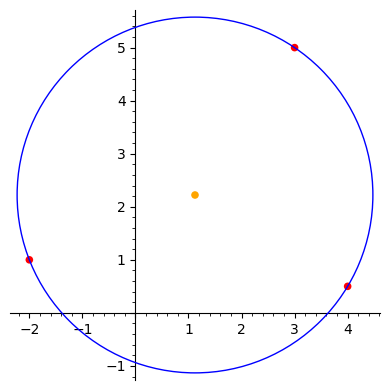

In [36]:
# Réponse 4.
P = [[3,5],[-2,1],[4,.5]]
graph = circle(o,r)+point(P,color="red",size=30)+point(o,color="orange",size=30)
show(graph)

### Question bonus

Nous considérons maintenant le problème de trouver un cercle qui passe par plus de trois points. De manière générale, il n'existe pas de solution à ce problème. Une approche possible consiste donc à trouver un cercle qui passe au plus proche des points donnés. Pour cela, nous pouvons appliquer la méthode des moindres carrés vue en TP.

1. Écrire une fonction `findApproximateCircle` qui retourne le centre et le rayon du cercle le plus proche (au sens des moindres carrés) d'une liste de points.  **Indication: votre fonction doit utiliser la résolution d'un système linéaire.**
1. Afficher les points (-1,-2), (0,6), (3,6), (2,6), (7,-2), (6,4.99), (3,6) et le cercle qui passe au plus proche d'eux.

In [ ]:
# Réponse 1.

In [ ]:
# Réponse 2.
